# Customising Plots

Matplotlib allows for quickly creating plots which are clear and informative. However, they can also be flexible, allowing for a wide range of customisation. This can allow you to adjust your plots to:

*   Improve clarity
*   Improve accessibility (e.g. font size, colour-blindness, etc)
*   Look attractive/eye-catching
*   Match a graphic design style
*   Create a personalised look

This notebook aims to take you through some of the ways you can personalise plots.



## RcParams

To define many aspects of the appearance of a plot, the runtime configuration of Matplotlib can be accessed. This is a Python dictionary that holds various values that define the behaviour of Matplotlib as a whole. We may edit a parameter within it by calling the ```update``` method of ```rcParams``` (note this sits within ```matplotlib``` as opposed to ```matplotlib.pyplot```). This is not the only way to access many of these values, but it is common.

We can provide this function a dictionary containing one or more key-values pairs to set the values within ```rcParams```. These changed options will take effect until they are changed back or the program ends. A full list of editable values can be found in [the documentation](https://matplotlib.org/stable/api/matplotlib_configuration_api.html). This is a good place to look if you want to create a particular effect and many examples you'll find will edit some of these parameters.

If you want to reset the runtime configuration to it's default values, try the command ```mpl.rcParams.update(mpl.rcParamsDefault)```.

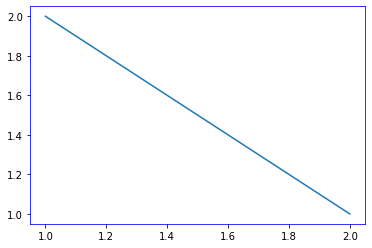

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Update the runtime configuration such that the default font size is 26 and the colours of the axes are blue
# The curly brackets specifies a dictionary
# The dictionary is specified with a number of key-pair entries, separated by commas
# The keys are strings which define what is being changed
# The value follows the colons and specifies the value it is to be changed to
mpl.rcParams.update({"font.size": 26, "axes.edgecolor":"blue"})

# Plot a simple plot to show off the effect of the changes
plt.plot([1,2], [2,1])

## PcParams Examples

We can customise a number of features of our plot using ```rcParams```. We outline a few in the following example:

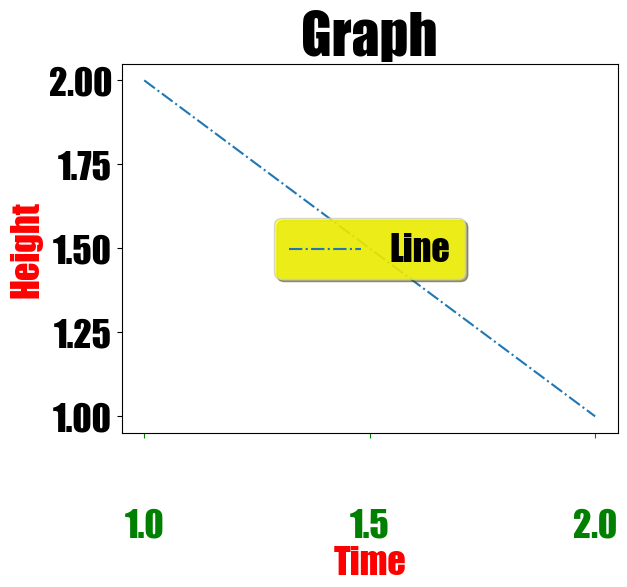

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)

# Set the default fontsize
mpl.rcParams.update({"font.size": 26})
# Set the default font family to "fantasy"
mpl.rcParams.update({"font.family": "fantasy"})
# Set the axis labels to red
mpl.rcParams.update({"axes.labelcolor": "red"})
# Set the values on the x-axis to be green
mpl.rcParams.update({"xtick.color": "green"})
# Set the title font size to 40
mpl.rcParams.update({"axes.titlesize": 40})
# Give the legend a shadow
mpl.rcParams.update({"legend.shadow": True})
# Set the legend background to black
mpl.rcParams.update({"legend.facecolor": "Yellow"})
# Set the legend to appear in the centre of the graph (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html for valid options)
mpl.rcParams.update({"legend.loc": "center"})
# Move the numbers of on the x-axis further from the x-axis
mpl.rcParams.update({"xtick.major.pad": 50})

# Plot a simple plot to show off the effect of the changes
plt.xlabel("Time")
plt.ylabel("Height")
plt.title("Graph")
plt.plot([1,2], [2,1], label="Line", linestyle="dashdot")
plt.legend()

## Plot Background

We can plot an image using ```imshow```. First, we need to read it in using the ```plt.imread``` command. This can read in a png file from a local file path or a url. If you're interested, under the hood this produces a Numpy array with three dimensions. The first two relate to the vertical and horizontal dimension and the third relates to the RGB values of a particular pixel.

We can pass this image to ```imshow``` and , optionally, set the extent of the image. This prevents the image being stretched over the range 0-800 vertically and 0-600 vertically and resizes it appropriately for the plot.

/tmp/ipykernel_18613/3322968277.py:12: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  image = plt.imread("https://raw.githubusercontent.com/coolernato/Plotting-in-Python-with-Matplotlib/main/queens_tower.png")


<class 'numpy.ndarray'>
(800, 600, 3)


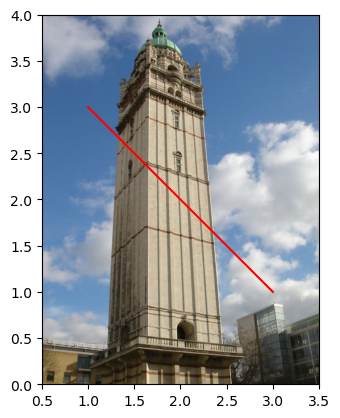

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Reset the runtime configuration
mpl.rcParams.update(mpl.rcParamsDefault)

# Create the figure and axes
fig = plt.figure()
ax = plt.axes()

# Read in a png file from a url or from a local file path
image = plt.imread("https://raw.githubusercontent.com/coolernato/Plotting-in-Python-with-Matplotlib/main/queens_tower.png")

# Examine the image
print(type(image))
print(image.shape)

# Plot the image
# Define the extent using the extent optional argument
plt.imshow(image, extent=[0.5,3.5, 0, 4])
# Plot another line on top of the picture
plt.plot([1,3], [3,1], color="red")

## Text

Sometimes it can be helpful to add text to a figure to annotate it. This can be achieved with the ```plt.text``` command ([manual page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)). The first arguments provided to this are the x and y coordinates of the bottom left of the text in the coordinates of the axes. The third argument is a string whose value is to be used as the text in the figure. Note that, as part of the this string, you may include the characters ```"\n"``` to indicate a new line.

In the example below, the text is used to annotate a histogram with statical data.

4134.25 3937.5625


Text(30, 4, 'Mean: 62.75\nStandard Deviation: 14.0\nMinimum: 30\nMaximum: 90')

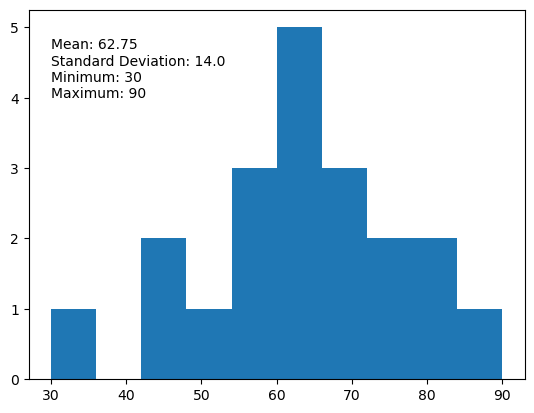

In [4]:
import matplotlib.pyplot as plt
import math

# Create the data
test_scores = [65, 70, 59, 50, 75, 66, 64, 30, 63, 90, 61, 60, 68, 45, 72, 57, 54, 81, 83, 42]
# Calcualte the mean, standard deviation, minimum and maximum
mean = sum(test_scores) / len(test_scores)
sum_of_squares = 0
for score in test_scores:
  sum_of_squares = sum_of_squares + score ** 2
print(sum_of_squares /len(test_scores), mean ** 2)
standard_deviation = math.sqrt(sum_of_squares /len(test_scores) - mean ** 2)
minimum = min(test_scores)
maximum = max(test_scores)

# Create the text to be written
# The "\n"s indicate Matplotlib is to start a new line
text = "Mean: " + str(mean) + "\nStandard Deviation: "+ str(round(standard_deviation, 1)) + "\nMinimum: "+ str(minimum) +"\nMaximum: "+ str(maximum)

# Create a histogram
plt.hist(test_scores)

# Plot the text
plt.text(30, 4, text)

## Exercise

In the boring-looking plot below, try to make it a little more interesting using some of the techniques discussed above. Feel free to make it tacky and garish if it helps you test out some of the features discussed! This exercise doesn't have a sample solution as there's no specific end goal to work toward. Be creative!

Text(6, 1, 'Mean 1: 4.0\nMean 2: 3.86')

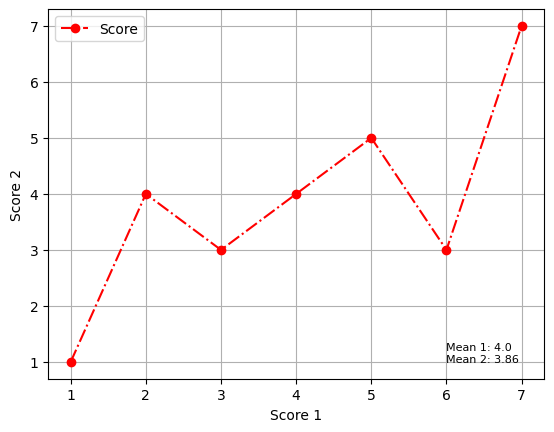

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

score_1 = [1, 2, 3, 4, 5, 6, 7]
score_2 = [1, 4, 3, 4, 5, 3, 7]
plt.plot(score_1, score_2, linestyle="-.", marker='o', label="Score", color="red")
plt.xlabel("Score 1")
plt.ylabel("Score 2")
plt.grid(visible=True, which='both', axis='both')
plt.legend()

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({"font.size": 8})

mean_1 = sum(score_1) / len(score_1)
mean_2 = sum(score_2) / len(score_2)
text = "Mean 1: " + str(round(mean_1, 2)) + "\nMean 2: "+ str(round(mean_2, 2))
plt.text(6, 1, text)
